Title: Pathways Asscociated with Genes Implicated by GWAS and single-cell RNAseq
Author: Fallon Ratner
Date: 20-02-2024

## Setting Up
- Import Libraries
- Read in datasets: SCZ GWAS mapped genes, DEGs from Sawada organoids, and DEGs from Notaras organoids
- Identify common genes between gwas and each organoid DEG
- Use gseapy to identify cellular pathways associated with the genes
- Visualize the results


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp

#select relevant working directory
os.chdir("C:/Users/fallo/OneDrive/Documents/URF_2023/Datasets")

gwas = pd.read_csv("SCZ_GWAS_mapped_genes.txt", sep='\t')
# Set Gene_name column in gwas DataFrame
gwas['Gene_name'] = gwas['symbol']

notaras_deg = pd.read_csv("notaras_deg_condition.csv")
#skip first row 
sawada_deg = pd.read_csv("sawada_deg_condition.csv", skiprows = 1)

#Sawada selection criteria: log2FC > 0.585 and FDR < 0.01
#Apply this criteria to Notaras DEGs
#Convert logFC to log2FC
notaras_deg['Log2FC'] = np.log2(np.exp(notaras_deg['logFC']))

#subset_notaras_deg <- notaras_deg[notaras_deg$log2FC > 0.585 & notaras_deg$FDR < 0.01, ]
# no genes from notaras meet this critera so changing the FDR threshold to 0.1
subset_notaras_deg = notaras_deg[(notaras_deg['Log2FC'] > 0.585) & (notaras_deg['FDR'] < 0.1)]

## Overlap between GWAS and Sawada DEGs

In [8]:
# Find common genes
common_genes_sw = set(gwas['Gene_name']).intersection(sawada_deg['Gene_name'])

# Convert common genes to a list
common_genes_list_sw = list(common_genes_sw)

#Print the common genes
print(common_genes_list_sw)
#Print the number of common genes
len(common_genes_list_sw)

['EFNA5', 'ANKS1B', 'NRGN', 'FUT9', 'DBF4', 'CACNA1C', 'EPHX2', 'NXPH4', 'INA', 'CKB', 'SLC32A1', 'BCL11B', 'TKT', 'TCF4']


14

                                                 Term  Adjusted P-value
0                                   GABAergic synapse          0.209455
1                Retrograde endocannabinoid signaling          0.209455
2                              MAPK signaling pathway          0.209455
3                     Arginine and proline metabolism          0.209455
4                                  Nicotine addiction          0.209455
5                              Synaptic vesicle cycle          0.209455
6                           Pentose phosphate pathway          0.209455
7                                          Peroxisome          0.209455
8                  Mannose type O-glycan biosynthesis          0.209455
9                         Arachidonic acid metabolism          0.209455
10                          Type II diabetes mellitus          0.209455
11                                 Morphine addiction          0.209455
12                     Glycosphingolipid biosynthesis          0

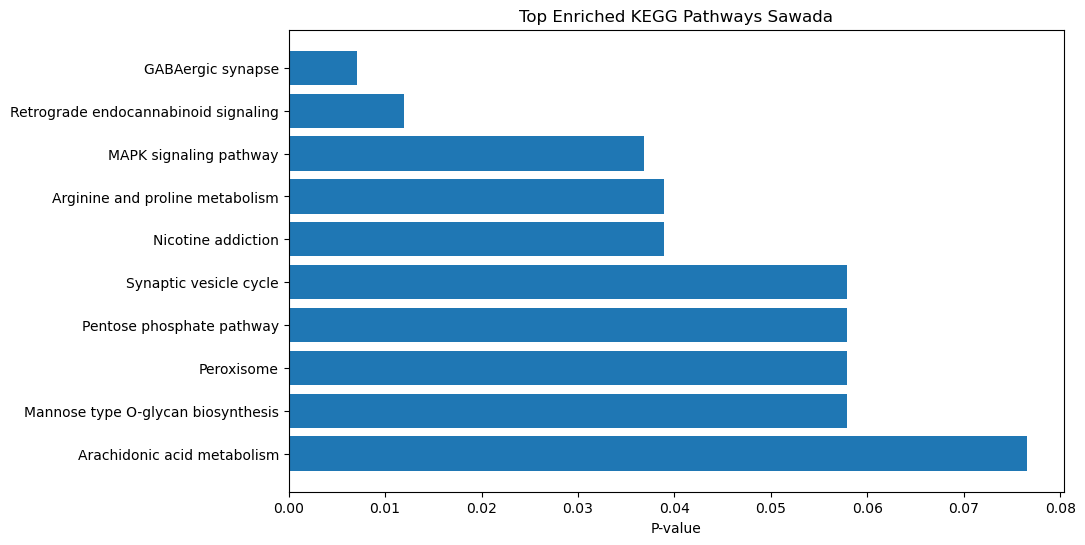

In [9]:
# Perform pathway enrichment analysis using KEGG gene sets
enr_sw = gp.enrichr(gene_list=common_genes_list_sw, organism='Human', gene_sets='KEGG_2019_Human', background=list(gwas['Gene_name']))

# Print the results
print(enr_sw.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways = enr_sw.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched KEGG Pathways Sawada')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()

                                                  Term  Adjusted P-value
0            substantia nigra development (GO:0021762)          0.049253
1         regulation of insulin secretion (GO:0050796)          0.069072
2    regulation of substrate adhesion-dependent cel...          0.069072
3        embryonic forelimb morphogenesis (GO:0035115)          0.069072
4    carboxylic acid transmembrane transport (GO:19...          0.069072
..                                                 ...               ...
132  regulation of nucleic acid-templated transcrip...          0.278771
133  regulation of cellular macromolecule biosynthe...          0.278771
134  transmembrane receptor protein tyrosine kinase...          0.278771
135          protein-DNA complex assembly (GO:0065004)          0.319991
136  cellular protein modification process (GO:0006...          0.567526

[137 rows x 2 columns]


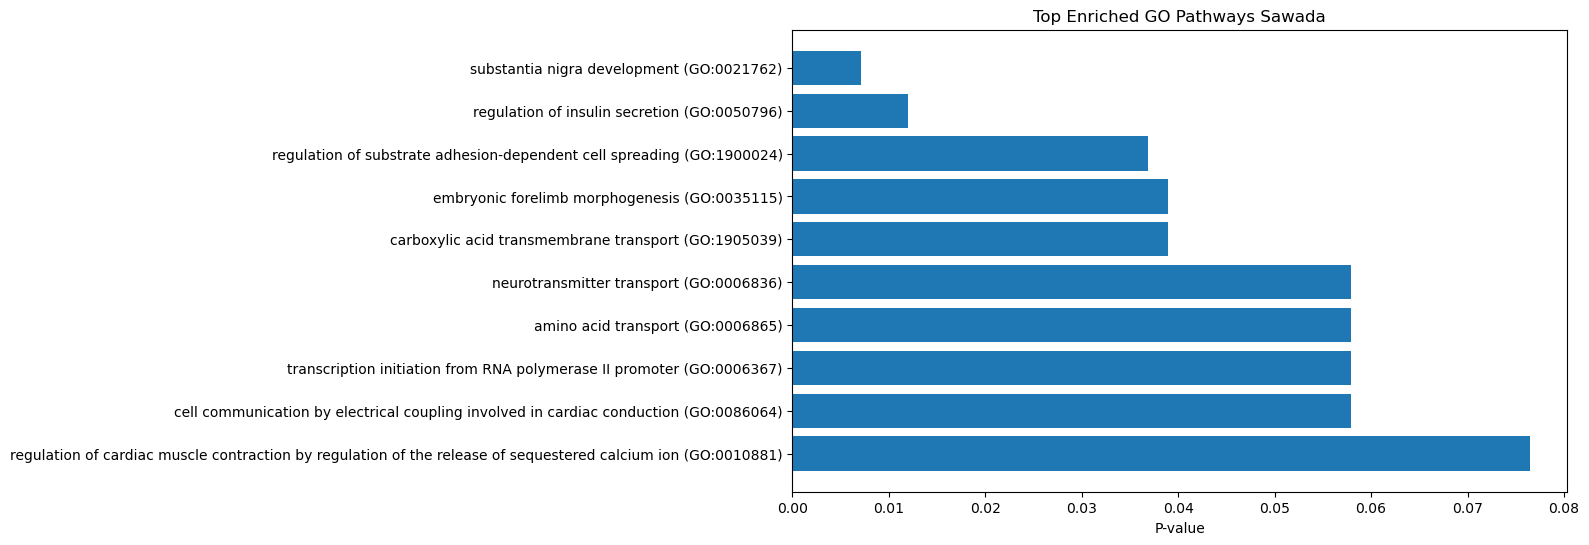

In [10]:
# Perform pathway enrichment analysis using GO gene sets
enr_sw_go = gp.enrichr(gene_list=common_genes_list_sw, organism='Human', gene_sets= 'GO_Biological_Process_2018', background=list(gwas['Gene_name']))

# Print the results
print(enr_sw_go.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways_go = enr_sw_go.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways_go['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched GO Pathways Sawada')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()

## Overlap between GWAS and Notaras DEGs

In [11]:
# Find common genes
common_genes_nr = set(gwas['Gene_name']).intersection(subset_notaras_deg['Gene_name'])

# Convert common genes to a list
common_genes_list_nr = list(common_genes_nr)

#Print the common genes
print(common_genes_list_nr)
#Print the number of common genes
len(common_genes_list_nr)

['FURIN', 'TWF2', 'COX5B', 'ARPC3', 'FES', 'NT5DC2', 'PRKCD', 'SMIM4', 'TKT', 'CCDC134', 'SERF2', 'TRANK1', 'GALNT10', 'C12orf10', 'ECM1', 'DGKZ', 'SHMT2', 'PMM1', 'BAK1', 'GLYCTK', 'HIST1H2BN', 'ARL6IP4', 'PLCB2', 'PRR13', 'RRAS', 'SPATS2L', 'CLTA', 'RPS18', 'PEX16', 'PRSS16', 'RPS17', 'SNX8', 'ALDOA', 'PCCB']


34

                                                  Term  Adjusted P-value
0                            Pentose phosphate pathway          0.012186
1              Glyoxylate and dicarboxylate metabolism          0.023574
2    Endocrine and other factor-regulated calcium r...          0.054079
3                      Fructose and mannose metabolism          0.054079
4                                             Ribosome          0.054079
..                                                 ...               ...
117                             cAMP signaling pathway          0.516108
118                               Viral carcinogenesis          0.520850
119                             MAPK signaling pathway          0.555935
120                       Systemic lupus erythematosus          0.928517
121                                         Alcoholism          0.935977

[122 rows x 2 columns]


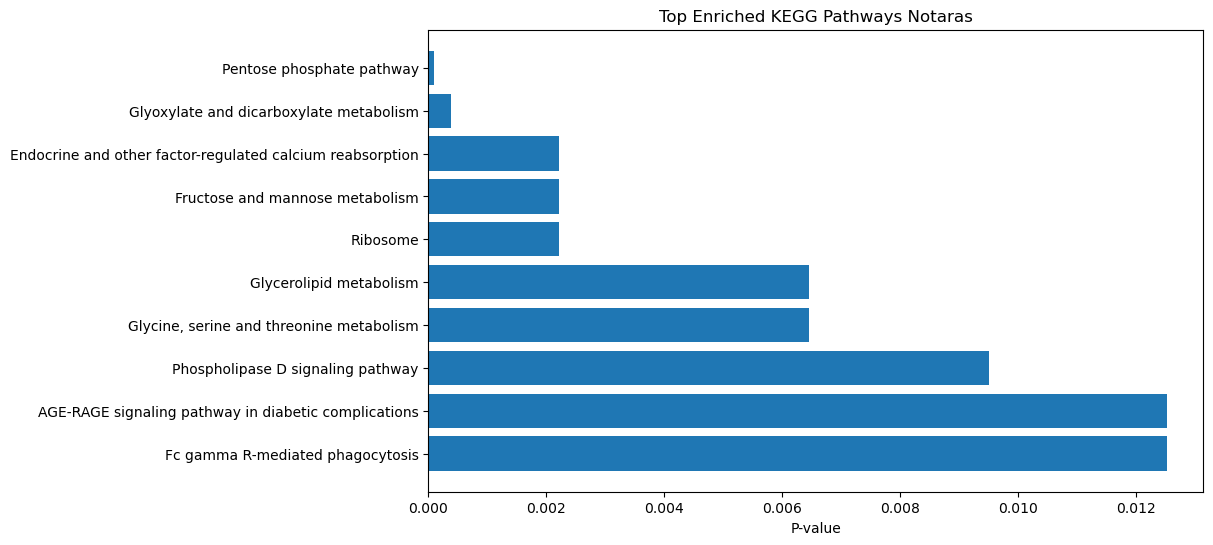

In [12]:
# Perform pathway enrichment analysis using KEGG gene set
enr_nr = gp.enrichr(gene_list=common_genes_list_nr, organism='Human', gene_sets='KEGG_2019_Human', background=list(gwas['Gene_name']))

# Print the results
print(enr_nr.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways = enr_nr.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched KEGG Pathways Notaras')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()

                                                  Term  Adjusted P-value
0            peptide biosynthetic process (GO:0043043)          0.051141
1                   viral gene expression (GO:0019080)          0.051141
2                 protein targeting to ER (GO:0045047)          0.051141
3                           viral process (GO:0016032)          0.097765
4    negative regulation of protein polymerization ...          0.097765
..                                                 ...               ...
392            vesicle-mediated transport (GO:0016192)          0.635662
393      regulation of cell proliferation (GO:0042127)          0.652403
394  protein modification by small protein conjugat...          0.684785
395                protein ubiquitination (GO:0016567)          0.698820
396       regulation of apoptotic process (GO:0042981)          0.712031

[397 rows x 2 columns]


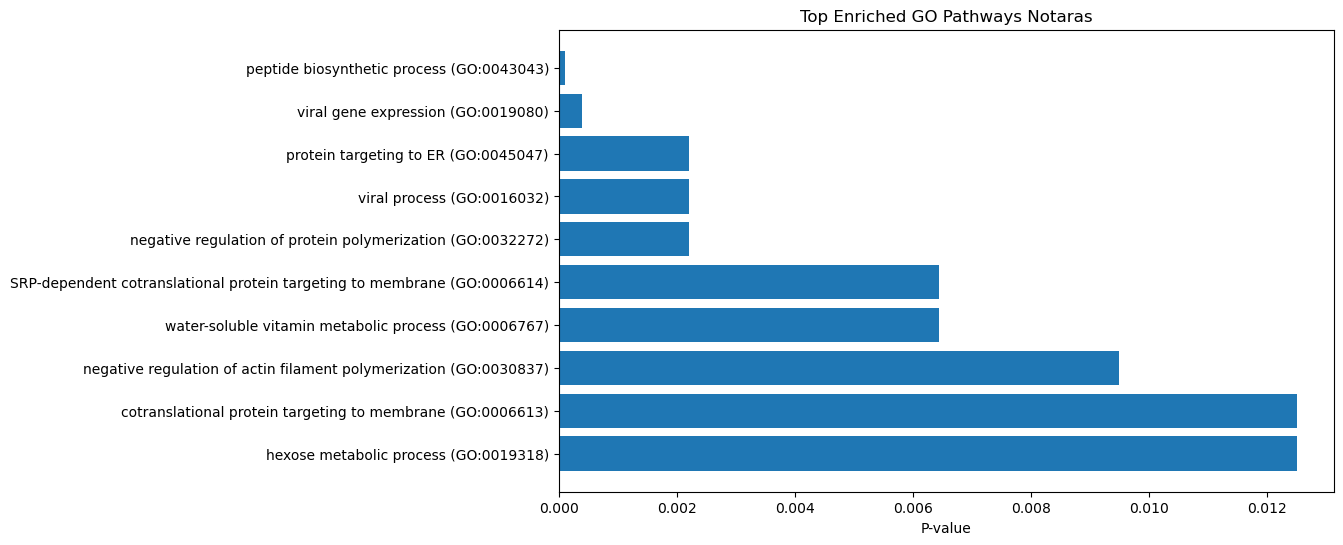

In [13]:
# Perform pathway enrichment analysis using GO gene set
enr_nr_go = gp.enrichr(gene_list=common_genes_list_nr, organism='Human', gene_sets= 'GO_Biological_Process_2018', background=list(gwas['Gene_name']))

# Print the results
print(enr_nr_go.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways_go = enr_nr_go.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways_go['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched GO Pathways Notaras')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()